In [1]:
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report
    import joblib
    import pickle

    df = pd.read_csv('data.csv')


    df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


    label_encoders = {}
    for column in ['Gender', 'Socio-Economic_Status', 'Parental_Education_Level', 'Residential_Area', 'Mode_of_Transportation']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # feature columns and target column
    feature_columns = ['Age', 'Gender', 'Socio-Economic_Status', 'Parental_Education_Level', 
                    'Previous_Year_Grades', 'Current_Year_Grades', 'Total_Days_Absent',
                    'Unexcused_Absences', 'Tardiness', 'Disciplinary_Actions', 
                    'Behavioral_Notes', 'Engagement_Score', 'Parental_Support', 
                    'Extracurricular_Participation', 'Peer_Influence_Score', 
                    'Bullying_Incidents', 'Health_Issues', 'Mental_Health_Support', 
                    'Sleep_Patterns_hours', 'Commute_Time_minutes', 
                    'Financial_Hardships']
    target_column = 'Dropout_Status'

    X = df[feature_columns]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training RandomForestClassifier 
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    print(classification_report(y_test, y_pred))

    # Save the model
    joblib.dump(model, 'dropout_prediction_model.pkl')


    loaded_model = joblib.load('dropout_prediction_model.pkl')
    new_student = [[16, 1, 1, 2, 85, 80, 5, 2, 1, 0, 2, 70, 2, 1, 2, 0, 1, 7, 15, 0, 0]]  # Example new data with all features
    prediction = loaded_model.predict(new_student)
    print("Predicted Dropout Status:", "Dropout" if prediction[0] == 1 else "No Dropout")



ValueError: Input y contains NaN.

In [4]:
data2 = pd.read_csv('orig.csv')
data2

,Student ID,Age,Gender,Socio-Economic Status,Parental Education Level,Residential Area,Previous Year Grades,Current Year Grades,Course Failures,Subject-Specific Scores,...,Peer Influence Score,Bullying Incidents,Health Issues,Mental Health Support,Sleep Patterns (hours),Commute Time (minutes),Mode of Transportation,Dropout Status,Scholarship Status,Financial Hardships
0,S001,15,Male,Low,High School,Urban,75,70,0,80,...,75,0,No,No,7,30,Bus,0,Yes,No
1,S002,16,Female,Middle,College,Urban,85,88,0,90,...,80,0,No,Yes,8,25,Walk,0,No,Yes
2,S003,15,Male,High,College,Rural,65,62,1,60,...,60,2,Yes,Yes,6,40,Bike,1,No,Yes
3,S004,14,Female,Middle,High School,Suburban,78,80,0,85,...,77,0,No,No,7,20,Walk,0,Yes,No
4,S005,17,Male,Low,Primary,Rural,55,52,2,55,...,55,3,Yes,Yes,5,45,Bus,1,No,Yes
5,S006,16,Female,High,Graduate,Urban,90,93,0,95,...,88,0,No,No,8,15,Car,0,Yes,No
6,S007,15,Male,Middle,Graduate,Suburban,82,79,1,83,...,79,1,No,No,7,25,Walk,0,No,Yes
7,S008,16,Female,Low,High School,Rural,60,58,1,61,...,65,2,Yes,Yes,6,35,Bike,1,No,Yes
8,S009,17,Male,High,College,Urban,88,85,0,92,...,85,0,No,No,8,15,Car,0,Yes,No
9,S010,14,Female,Middle,Primary,Suburban,50,49,3,45,...,50,4,Yes,Yes,5,50,Bus,1,No,Yes


In [24]:
orig = pd.read_csv('orig.csv')
anothr = pd.read_csv('data.csv')
anothr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Student ID                        40 non-null     object 
 1   Age                               40 non-null     int64  
 2   Gender                            40 non-null     int64  
 3   Socio-Economic Status             40 non-null     int64  
 4   Parental Education Level          40 non-null     int64  
 5   Residential Area                  40 non-null     int64  
 6   Previous Year Grades              40 non-null     int64  
 7   Current Year Grades               40 non-null     int64  
 8   Course Failures                   40 non-null     int64  
 9   Subject-Specific Scores           40 non-null     int64  
 10  Total Days Absent                 40 non-null     int64  
 11  Unexcused Absences                40 non-null     int64  
 12  Tardiness 

In [11]:
# orig
list(anothr[:0])

['Student ID',
 'Age',
 'Gender',
 'Socio-Economic Status',
 'Parental Education Level',
 'Residential Area',
 'Previous Year Grades',
 'Current Year Grades',
 'Course Failures',
 'Subject-Specific Scores',
 'Total Days Absent',
 'Unexcused Absences',
 'Tardiness',
 'Disciplinary Actions',
 'Behavioral Notes',
 'Engagement Score',
 'Parent-Teacher Meetings Attended',
 'Parental Support',
 'Extracurricular Participation',
 'Number of Activities',
 'Activity Type',
 'Peer Influence Score',
 'Bullying Incidents',
 'Health Issues',
 'Mental Health Support',
 'Sleep Patterns (hours)',
 'Commute Time (minutes)',
 'Mode of Transportation',
 'Dropout Status',
 'Scholarship Status',
 'Financial Hardships']

In [22]:
list = [anothr[:1]]
list

[  Student ID  Age  Gender  Socio-Economic Status  Parental Education Level  \
 0       S001   15       0                      0                         1   
 
    Residential Area  Previous Year Grades  Current Year Grades  \
 0                 0                    75                   70   
 
    Course Failures  Subject-Specific Scores  ...  Peer Influence Score  \
 0                0                       80  ...                     0   
 
    Bullying Incidents  Health Issues  Mental Health Support  \
 0                   0              0                      7   
 
    Sleep Patterns (hours)  Commute Time (minutes)  Mode of Transportation  \
 0                      30                       0                       1   
 
    Dropout Status  Scholarship Status  Financial Hardships  
 0               1                   0                  NaN  
 
 [1 rows x 31 columns]]

In [23]:
list2 = [orig[:0]]
list2

[Empty DataFrame
 Columns: [Student ID, Age, Gender, Socio-Economic Status, Parental Education Level, Residential Area, Previous Year Grades, Current Year Grades, Course Failures, Subject-Specific Scores, Total Days Absent, Unexcused Absences, Tardiness, Disciplinary Actions, Behavioral Notes, Engagement Score, Parent-Teacher Meetings Attended, Parental Support, Extracurricular Participation, Number of Activities, Activity Type, Peer Influence Score, Bullying Incidents, Health Issues, Mental Health Support, Sleep Patterns (hours), Commute Time (minutes), Mode of Transportation, Dropout Status, Scholarship Status, Financial Hardships]
 Index: []
 
 [0 rows x 31 columns]]

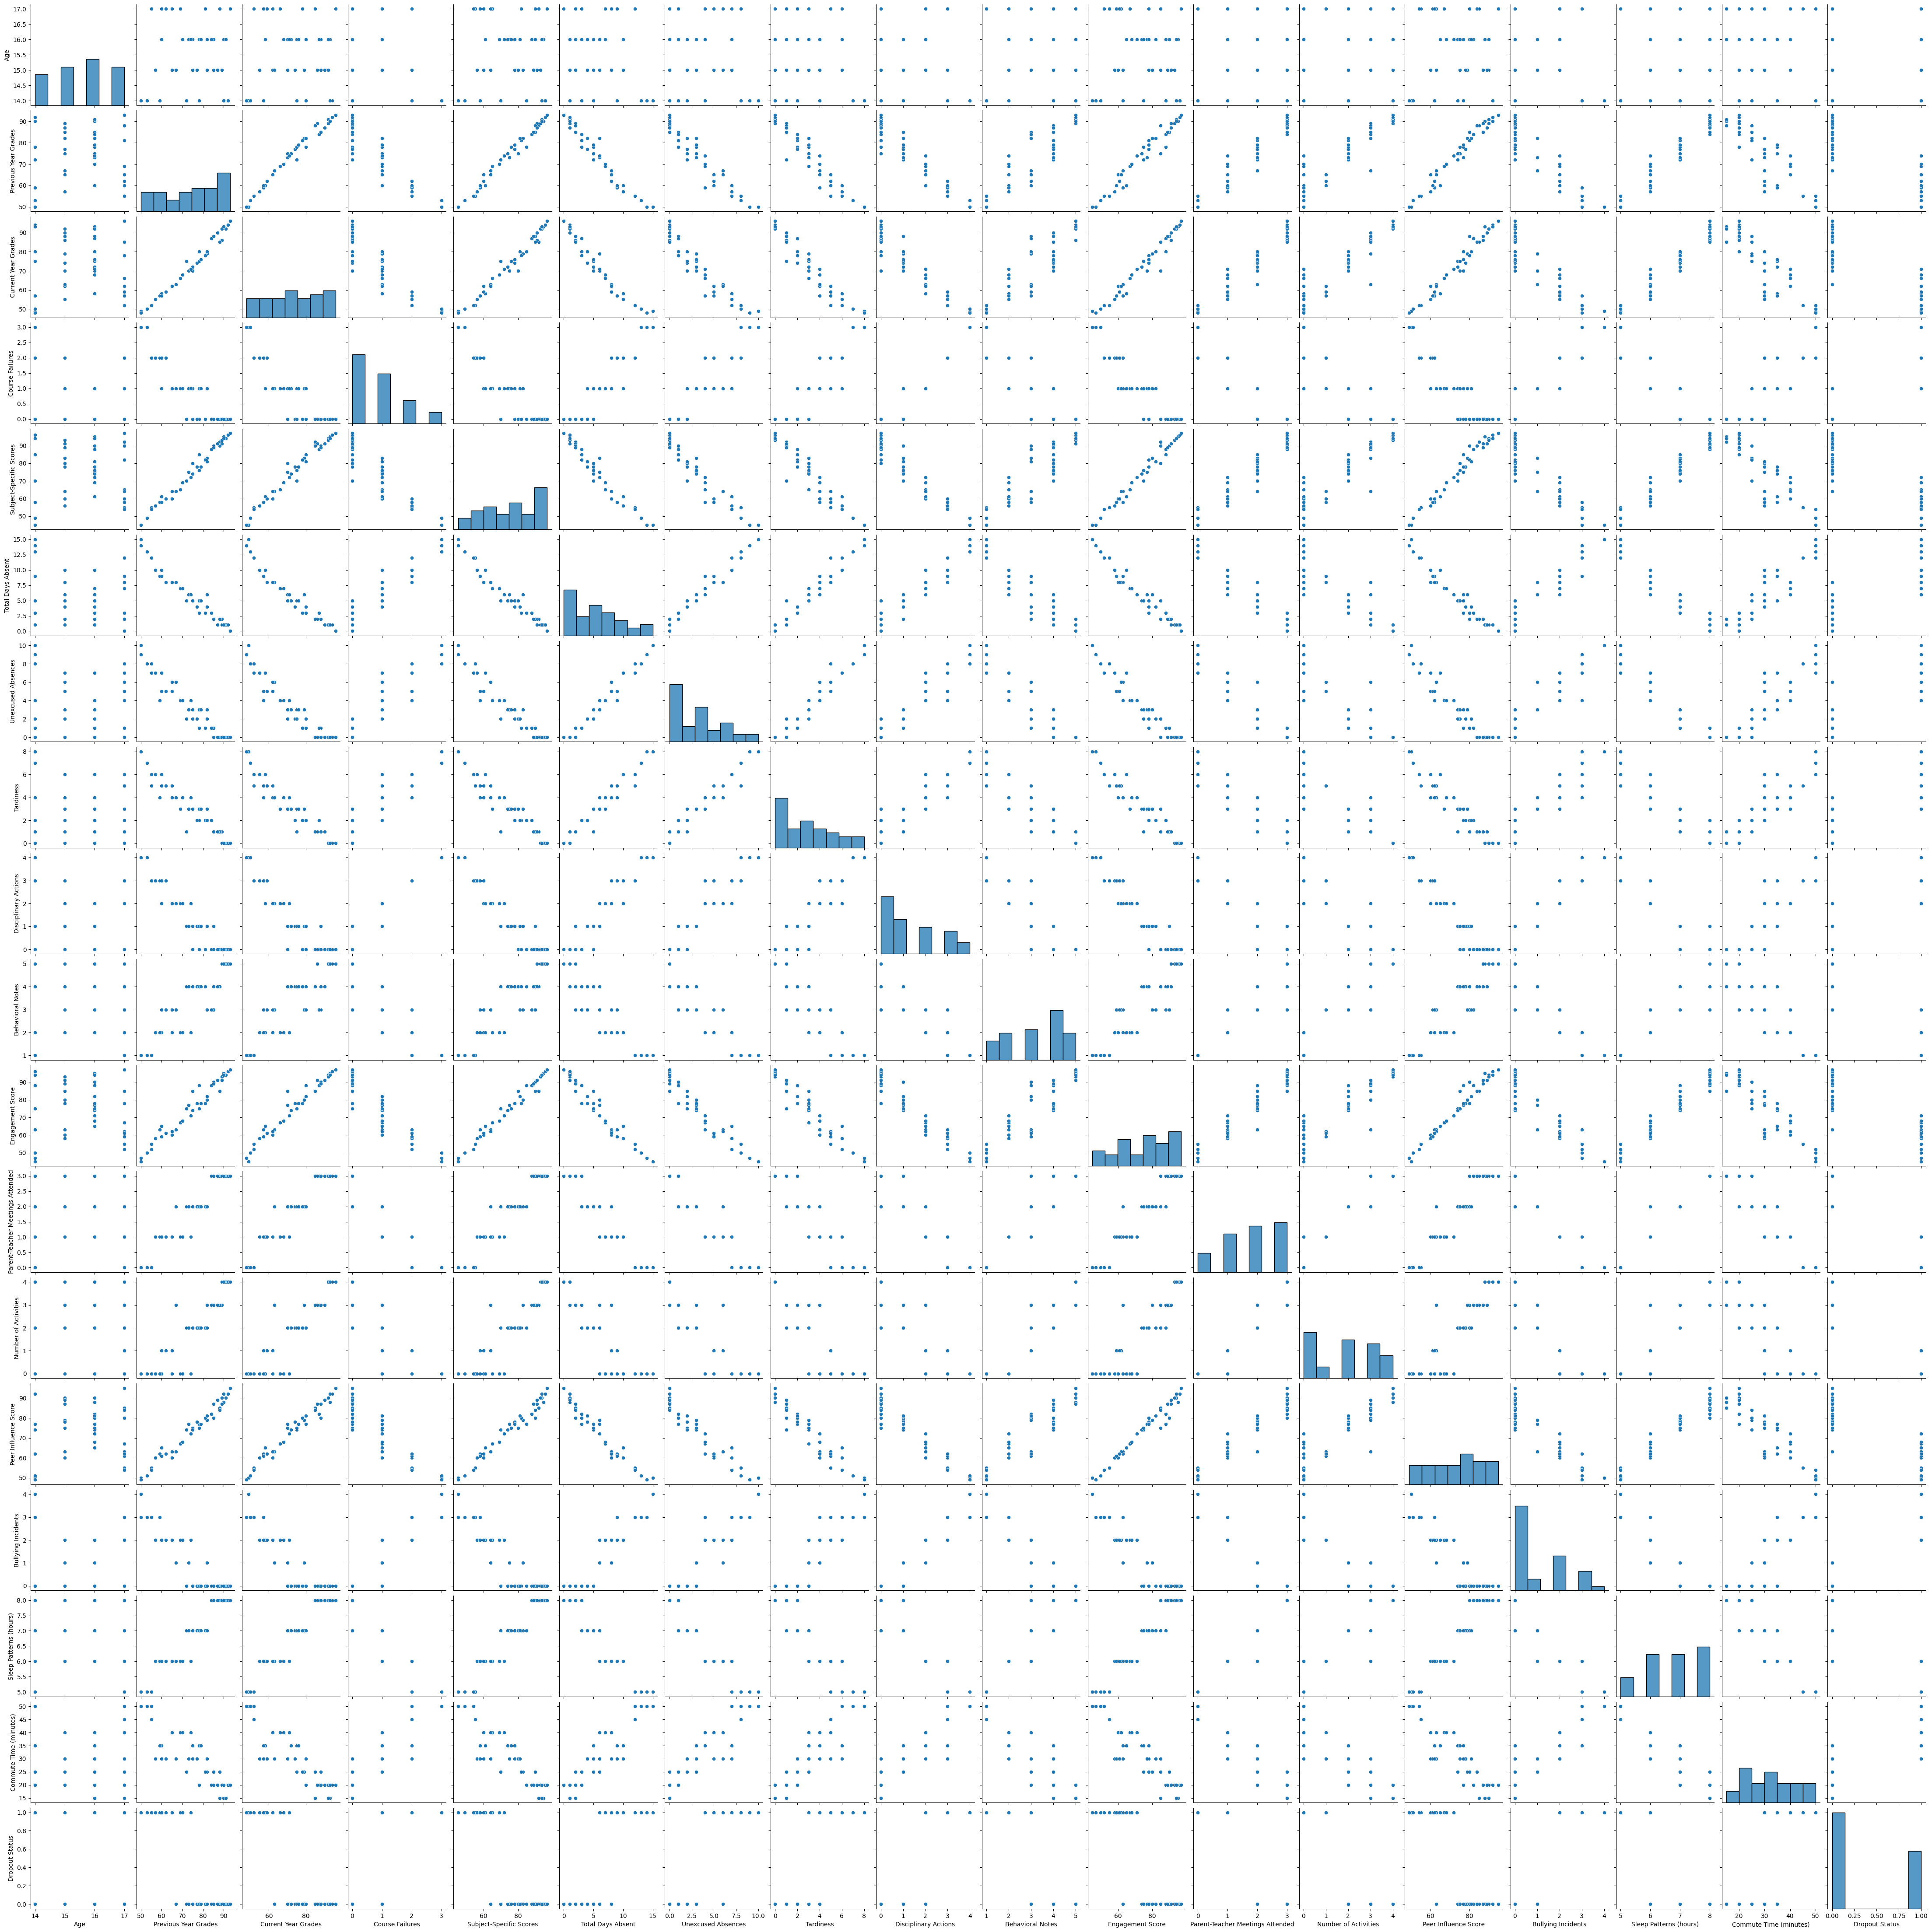

In [25]:
sns.pairplot(data=orig)